In [27]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.cluster import KMeans
sys.path.append(os.path.abspath('./scripts'))

In [16]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy

In [17]:
# to define my sql query
query = "SELECT * FROM xdr_data;"
# to load data from postgreSQL
df = load_data_from_postgres(query)
# to display the first few rows
if df is not None:
    print("Successfully loaded the data")
else:
    print("failed to load data")

d:\Week2\scripts\load_data.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [18]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [19]:
# to Display Columns Data Type
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               f

In [20]:
# to Identify Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps

In [21]:
column_name = 'Handset Type'
if column_name in df.columns and df[column_name].dtype == 'object':
    # Calculate value counts
    value_counts = df[column_name].value_counts()
    print(f"Value Counts for {column_name}:\n", value_counts)

    # Define a threshold for rarity categories with fewer than 5 occurrences
    threshold = 5
    rare_categories = value_counts[value_counts < threshold]
    
    if not rare_categories.empty:
        print(f"\nRare categories in '{column_name}':\n", rare_categories)
    else:
        print(f"\nNo rare categories found in '{column_name}'.")
else:
    print(f"Column '{column_name}' does not exist or is not an object type.")

Value Counts for Handset Type:
 Handset Type
Huawei B528S-23A                                     19752
Apple iPhone 6S (A1688)                               9419
Apple iPhone 6 (A1586)                                9023
undefined                                             8987
Apple iPhone 7 (A1778)                                6326
                                                     ...  
Tcl Communicatio. Alcatel Onetouch Pop 3 (5.5)           1
Microsoft Mobile. Nokia Lumia 630 Dual Sim Rm-978        1
Power Idea Techn. Rg160                                  1
Teletalk Pvt Ltd Colors F016                             1
Spa Condor Elect. F6                                     1
Name: count, Length: 1396, dtype: int64

Rare categories in 'Handset Type':
 Handset Type
Tcl Communicatio. Alcatel 3C                         4
Htc 10                                               4
Samsung Gt-I5800                                     4
Lenovo Lenovo A6020A40                             

In [22]:
# Define a threshold for rarity
threshold = 5
# to create a value count series
value_counts = df[column_name].value_counts()
# Combine rare categories into 'Other'
df[column_name] = df[column_name].apply(
    lambda x: x if pd.notnull(x) and value_counts.get(x, 0) >= threshold else 'Other')

# Check the new value counts
new_value_counts = df[column_name].value_counts()
print("\nNew Value Counts after combining rare categories:\n", new_value_counts)


New Value Counts after combining rare categories:
 Handset Type
Huawei B528S-23A                                                    19752
Apple iPhone 6S (A1688)                                              9419
Apple iPhone 6 (A1586)                                               9023
undefined                                                            8987
Apple iPhone 7 (A1778)                                               6326
                                                                    ...  
Samsung Galaxy Ace 2 (Gt-I8160)                                         5
Samsung Galaxy Tab S3 (Sm-T825)                                         5
Microsoft Mobile. Microsoft Rm-1099 Microsoft Lumia 435 Dual Sim        5
Apple iPhone Xs (A2100)                                                 5
Wiko Global Sasu Wiko Robby                                             5
Name: count, Length: 478, dtype: int64


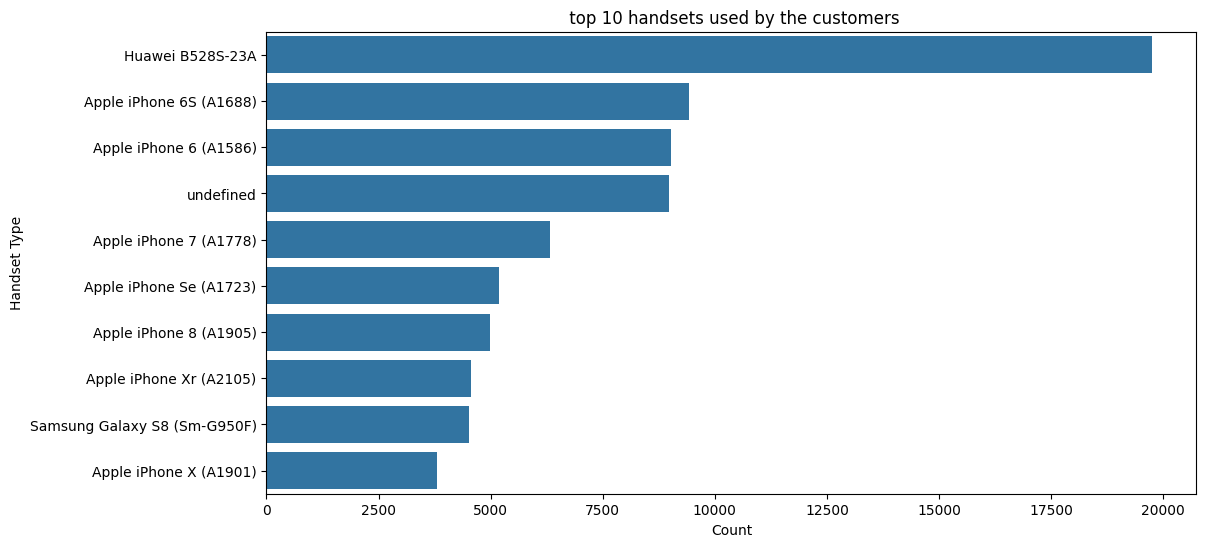

In [23]:
# Plot the value counts of the handset types
plt.figure(figsize=(12, 6))
sns.countplot(y=df[column_name], order=df[column_name].value_counts().index[:10])  # Top 10 categories
plt.title(' top 10 handsets used by the customers')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.show()

In [24]:
# to identify the top 3 handset manufacturers
# Specify the column containing handset manufacturer
column_name = 'Handset Manufacturer'  

# Check if the column exists
if column_name in df.columns:
    # Extract manufacturers (assuming they are the first word in the handset manufacturer)
    df['Manufacturer'] = df[column_name].str.split().str[0]
    
    # Get the top 3 manufacturers
    top_manufacturers = df['Manufacturer'].value_counts().head(3)
    
    # Display the top 3 manufacturers
    print("Top 3 Handset Manufacturers:\n", top_manufacturers)
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")

Top 3 Handset Manufacturers:
 Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [25]:
# to identify the top 5 handsets per top 3 handset manufacturer
# Check if the column exists
if column_name in df.columns:
    # Extract manufacturers (assuming they are the first word in the handset type)
    df['Manufacturer'] = df[column_name].str.split().str[0]
    
    # Get the top 3 manufacturers
    top_manufacturers = df['Manufacturer'].value_counts().head(3).index
    
    # Create a DataFrame to store the results
    results = {}

    # Loop through each top manufacturer and get the top 5 handsets
    for manufacturer in top_manufacturers:
        top_handsets = df[df['Manufacturer'] == manufacturer][column_name].value_counts().head(5)
        results[manufacturer] = top_handsets

    # Display the results
    for manufacturer, handsets in results.items():
        print(f"\nTop 5 Handsets for {manufacturer}:\n", handsets)
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")


Top 5 Handsets for Apple:
 Handset Manufacturer
Apple    59565
Name: count, dtype: int64

Top 5 Handsets for Samsung:
 Handset Manufacturer
Samsung    40839
Name: count, dtype: int64

Top 5 Handsets for Huawei:
 Handset Manufacturer
Huawei    34423
Name: count, dtype: int64


Number of duplicate IMEIs: 29174
Unique IMEIs in original DataFrame: 107270
Missing values in required columns:
 IMEI         572
Dur. (ms)      1
dtype: int64
Aggregated DataFrame shape: (107270, 17)
           IMEI  number_of_sessions  total_session_duration  \
0  4.400152e+11                   1                 74399.0   
1  4.402138e+11                   1                 86399.0   
2  1.194901e+12                   1                 87799.0   
3  1.198201e+12                   1                 56344.0   
4  1.202601e+12                   1                 18004.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                2530606.0                  23968.0          9125569.0   
1                1301037.0                  10391.0          8520422.0   
2                3440702.0                  21582.0          8410141.0   
3                2155310.0                  47026.0          5157701.0   
4                 356443.0                  40729.

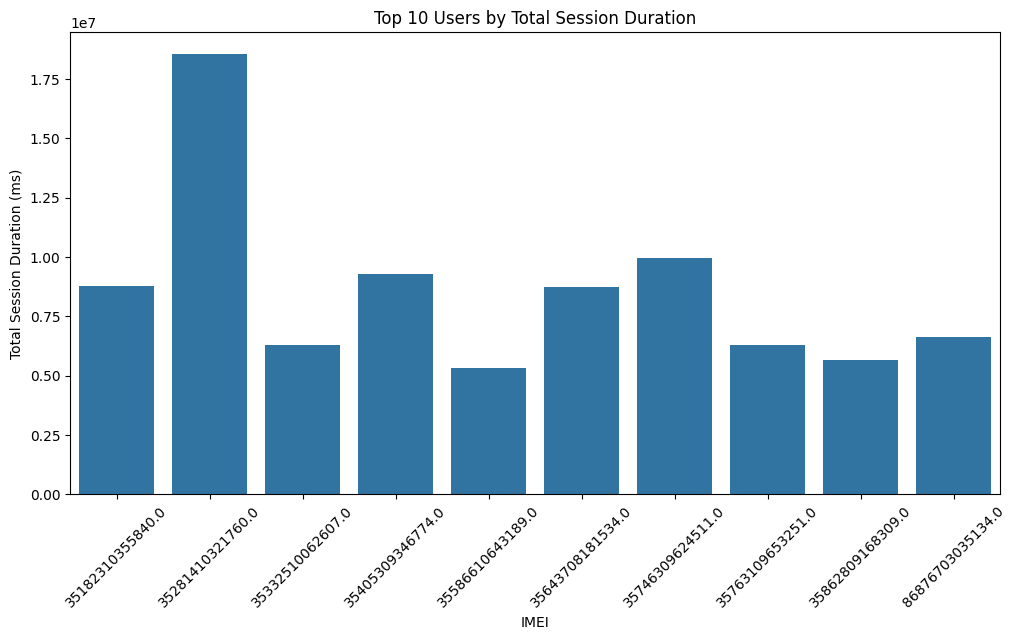

In [202]:
duplicate_imeis = df[df.duplicated(['IMEI'], keep=False)]
print("Number of duplicate IMEIs:", duplicate_imeis['IMEI'].nunique())
unique_imeis_count = df['IMEI'].nunique()
print("Unique IMEIs in original DataFrame:", unique_imeis_count)
missing_values = df[required_columns].isnull().sum()
print("Missing values in required columns:\n", missing_values[missing_values > 0])
print("Aggregated DataFrame shape:", aggregated.shape)
print(aggregated.head())
# Plotting the top 10 users by total session duration
top_users = aggregated.nlargest(10, 'total_session_duration')

plt.figure(figsize=(12, 6))
sns.barplot(x='IMEI', y='total_session_duration', data=top_users)
plt.title('Top 10 Users by Total Session Duration')
plt.xlabel('IMEI')
plt.ylabel('Total Session Duration (ms)')
plt.xticks(rotation=45)
plt.show()

Number of duplicate IMEIs: 29174
Unique IMEIs in original DataFrame: 107270
Missing values in required columns:
 IMEI         572
Dur. (ms)      1
dtype: int64
Aggregated DataFrame shape: (107270, 17)
           IMEI  number_of_sessions  total_session_duration  \
0  4.400152e+11                   1                 74399.0   
1  4.402138e+11                   1                 86399.0   
2  1.194901e+12                   1                 87799.0   
3  1.198201e+12                   1                 56344.0   
4  1.202601e+12                   1                 18004.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                2530606.0                  23968.0          9125569.0   
1                1301037.0                  10391.0          8520422.0   
2                3440702.0                  21582.0          8410141.0   
3                2155310.0                  47026.0          5157701.0   
4                 356443.0                  40729.

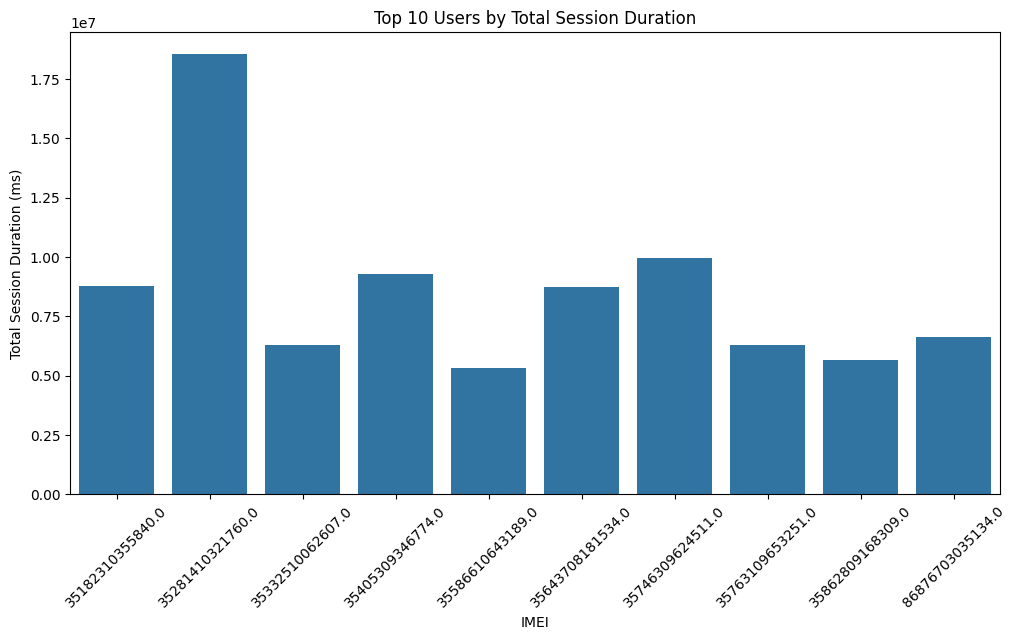

In [203]:
duplicate_imeis = df[df.duplicated(['IMEI'], keep=False)]
print("Number of duplicate IMEIs:", duplicate_imeis['IMEI'].nunique())
unique_imeis_count = df['IMEI'].nunique()
print("Unique IMEIs in original DataFrame:", unique_imeis_count)
missing_values = df[required_columns].isnull().sum()
print("Missing values in required columns:\n", missing_values[missing_values > 0])
print("Aggregated DataFrame shape:", aggregated.shape)
print(aggregated.head())
# Plotting the top 10 users by total session duration
top_users = aggregated.nlargest(10, 'total_session_duration')

plt.figure(figsize=(12, 6))
sns.barplot(x='IMEI', y='total_session_duration', data=top_users)
plt.title('Top 10 Users by Total Session Duration')
plt.xlabel('IMEI')
plt.ylabel('Total Session Duration (ms)')
plt.xticks(rotation=45)
plt.show()

In [204]:
# Define the applications to analyze
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Check the DataFrame columns
print("DataFrame Columns:", df.columns)

# Define required columns based on your dataset
required_columns = [
    'IMEI',  
    'Dur. (ms)'  
] + [f'{app} DL (Bytes)' for app in applications] + [f'{app} UL (Bytes)' for app in applications]

# Check for missing columns
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print("Missing columns:", missing_columns)
else:
    # Initialize a DataFrame to hold aggregated results
    aggregated = df.groupby('IMEI').agg(
        number_of_sessions=('Dur. (ms)', 'count'),
        total_session_duration=('Dur. (ms)', 'sum')
    ).reset_index()

    # Add application-specific data
    for app in applications:
        dl_col = f'{app} DL (Bytes)'
        ul_col = f'{app} UL (Bytes)'

        # Check if the columns exist before summing
        if dl_col in df.columns and ul_col in df.columns:
            aggregated[f'{app} DL (Bytes)'] = df.groupby('IMEI')[dl_col].sum().reset_index(drop=True)
            aggregated[f'{app} UL (Bytes)'] = df.groupby('IMEI')[ul_col].sum().reset_index(drop=True)
        else:
            print(f"Columns {dl_col} or {ul_col} are missing in the DataFrame.")

    # Display the aggregated results
    print(aggregated)

DataFrame Columns: Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B <

In [205]:
try:
    from sklearn.decomposition import PCA
    print("PCA imported successfully!")
except ImportError as e:
    print("Import error:", e)

PCA imported successfully!


In [206]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Check for missing values in numeric columns
missing_values = df[numeric_cols].isnull().sum()
print("Missing values in numeric columns:\n", missing_values[missing_values > 0])

Missing values in numeric columns:
 Bearer Id                                      991
Start ms                                         1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                 

In [207]:
# Assess missing values in unique identifiers
missing_ids = df[['IMSI', 'Bearer Id', 'IMEI', 'MSISDN/Number']].isnull().sum()
print("Missing values in unique identifiers:\n", missing_ids)

# Drop records with missing unique identifiers
df.dropna(subset=['IMSI', 'Bearer Id', 'IMEI', 'MSISDN/Number'], inplace=True)

# Check the number of remaining records
print("Remaining records after dropping missing IDs:", df.shape[0])

Missing values in unique identifiers:
 IMSI              570
Bearer Id         991
IMEI              572
MSISDN/Number    1066
dtype: int64
Remaining records after dropping missing IDs: 148506


In [208]:
# List of unique identifier columns
unique_identifiers = ['IMSI', 'Bearer Id', 'IMEI', 'MSISDN/Number']

# Identify numeric columns excluding unique identifiers
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(unique_identifiers)
# Fill missing values with the mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
# Check for any remaining missing values in numeric columns
remaining_missing = df[numeric_cols].isnull().sum()
print("Remaining missing values in numeric columns:\n", remaining_missing[remaining_missing > 0])

Remaining missing values in numeric columns:
 Series([], dtype: int64)


In [209]:
# Calculate the percentage of missing values before treatment
missing_values_before = df.isnull().sum()
total_records_before = 150001  # Adjust this to your original record count
percentage_missing_before = (missing_values_before / total_records_before) * 100

# After treatment
remaining_missing_after = df.isnull().sum()
percentage_missing_after = (remaining_missing_after / df.shape[0]) * 100

# Create a summary for missing values
missing_summary = {
    'Before Treatment': percentage_missing_before[percentage_missing_before > 0],
    'After Treatment': percentage_missing_after[percentage_missing_after > 0]
}

print("Missing Values Summary:\n", missing_summary)

# Original number of records
original_count = df.shape[0]

# Identify numeric columns, excluding unique identifiers
unique_identifiers = ['IMSI', 'Bearer Id', 'IMEI', 'MSISDN/Number']
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(unique_identifiers)
# Calculate Q1 and Q3 for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

# Calculate records removed
records_removed = df.shape[0] - df_cleaned.shape[0]
print("Records Removed Due to Outliers:", records_removed)

Missing Values Summary:
 {'Before Treatment': Last Location Name    0.106666
dtype: float64, 'After Treatment': Last Location Name    0.10774
dtype: float64}
Records Removed Due to Outliers: 63539


In [210]:
# column names
duration_col = 'Dur. (ms)'
dl_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)']
ul_columns = ['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)']

# Calculate total duration and total data for each user
df['Total Duration'] = df[duration_col]
df['Total DL'] = df[dl_columns].sum(axis=1)
df['Total UL'] = df[ul_columns].sum(axis=1)
df['Total Data'] = df['Total DL'] + df['Total UL']
# to drop duplications
df['Decile'] = pd.qcut(df['Total Duration'], 10, labels=False, duplicates='drop')
# Compute total data per decile class
decile_summary = df.groupby('Decile')['Total Data'].sum().reset_index()
decile_summary.columns = ['Decile', 'Total Data (DL + UL)']

print("Total Data per Decile Class:\n", decile_summary)


Total Data per Decile Class:
    Decile  Total Data (DL + UL)
0       0          7.212499e+12
1       1          7.209377e+12
2       2          7.248292e+12
3       3          1.538678e+13
4       4          6.156158e+12
5       5          7.212029e+12
6       6          7.177469e+12
7       7          7.228775e+12
8       8          7.232874e+12


In [211]:
# for calculating metrics
metrics_summary = df.describe()
print(metrics_summary)

          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.485060e+05  148506.000000  148506.000000  1.485060e+05  1.485060e+05   
mean   1.014676e+19     499.205143     498.640196  1.050841e+05  2.082016e+14   
std    2.893262e+18     288.563193     288.070129  8.107274e+04  1.524347e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.824875e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     749.000000  1.329328e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.082522e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.485060e+05  1.485060e+05    148506.000000    148506.000000   
mean    4.190654e+10  4.850068e+13       106.199942        17.628232   
std     2.450976e+12  2.243217e+13       529.634755   

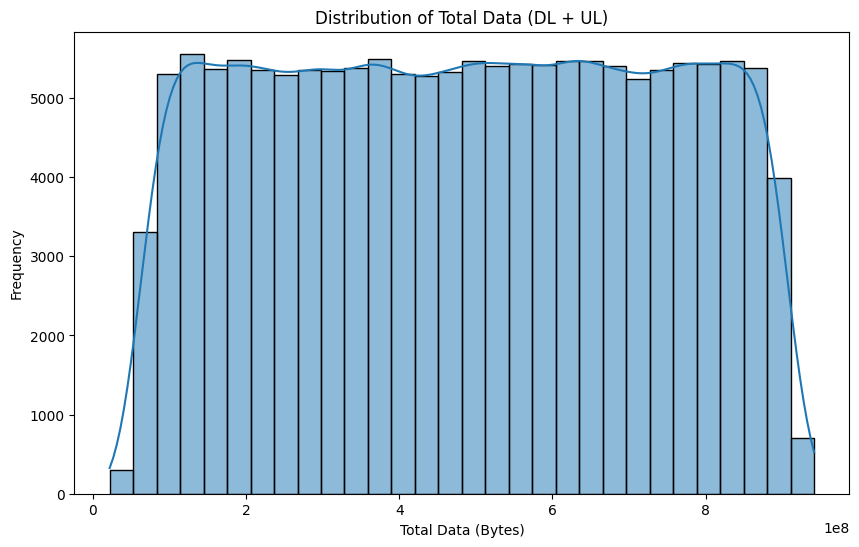

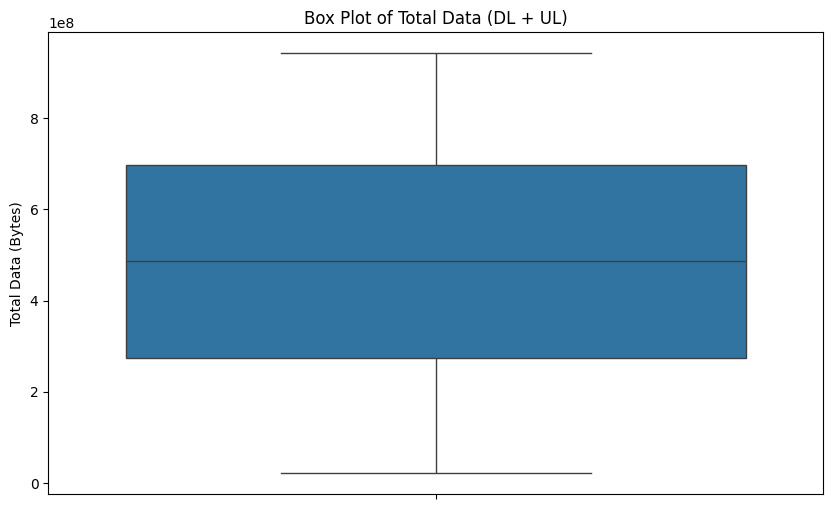

In [212]:
# Histogram for Total Data
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Data'], bins=30, kde=True)
plt.title('Distribution of Total Data (DL + UL)')
plt.xlabel('Total Data (Bytes)')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Total Data
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Total Data'])
plt.title('Box Plot of Total Data (DL + UL)')
plt.ylabel('Total Data (Bytes)')
plt.show()

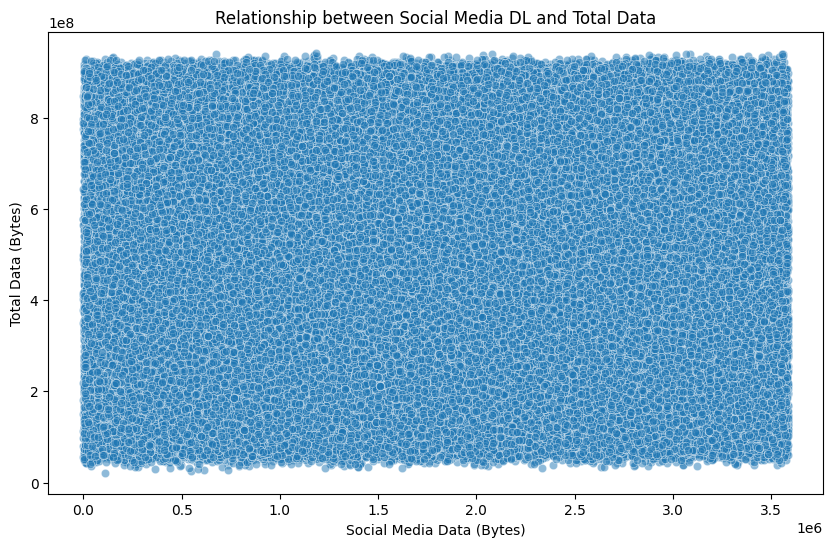

In [213]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Social Media DL (Bytes)'], y=df['Total Data'], alpha=0.5)
plt.title('Relationship between Social Media DL and Total Data')
plt.xlabel('Social Media Data (Bytes)')
plt.ylabel('Total Data (Bytes)')
plt.show()

In [214]:
# Correlation matrix for specified columns
correlation_matrix = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                         'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                         'Other DL (Bytes)']].corr()
print(correlation_matrix)

                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.002119   
Google DL (Bytes)                      -0.002119           1.000000   
Email DL (Bytes)                        0.005036          -0.000069   
Youtube DL (Bytes)                     -0.001239           0.002022   
Netflix DL (Bytes)                     -0.001449           0.000911   
Gaming DL (Bytes)                       0.001490          -0.001291   
Other DL (Bytes)                        0.005687          -0.002460   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.005036           -0.001239   
Google DL (Bytes)               -0.000069            0.002022   
Email DL (Bytes)                 1.000000            0.001651   
Youtube DL (Bytes)               0.001651            1.000000   
Netflix DL (Bytes)               0.001243            0.001055   
Gaming DL (Bytes)                0.000070

In [215]:
# Update the features list based on the actual available columns
features = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                         'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                         'Other DL (Bytes)']]  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_result = pca.fit_transform(scaled_features)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each component:", explained_variance)

Explained Variance by each component: [0.14432816 0.14357065]


In [216]:
# Calculate Sessions Frequency using MSISDN/Number
sessions_frequency = df.groupby('MSISDN/Number')['MSISDN/Number'].count().reset_index(name='Sessions Frequency')

# Calculate Average Duration of Sessions
average_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].mean().reset_index()
average_duration.columns = ['MSISDN/Number', 'Average Session Duration (ms)']

# Calculate Total Session Traffic
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
total_traffic = df.groupby('MSISDN/Number')['Total Traffic (Bytes)'].sum().reset_index()
total_traffic.columns = ['MSISDN/Number', 'Total Session Traffic (Bytes)']

# Combine Metrics into a Single DataFrame
engagement_metrics = pd.merge(sessions_frequency, average_duration, on='MSISDN/Number')
engagement_metrics = pd.merge(engagement_metrics, total_traffic, on='MSISDN/Number')

# Display the engagement metrics
print(engagement_metrics)

        MSISDN/Number  Sessions Frequency  Average Session Duration (ms)  \
0        3.360100e+10                   1                       116720.0   
1        3.360100e+10                   1                       181230.0   
2        3.360100e+10                   1                       134969.0   
3        3.360101e+10                   1                        49878.0   
4        3.360101e+10                   2                        18552.0   
...               ...                 ...                            ...   
106466   3.379000e+10                   1                         8810.0   
106467   3.379000e+10                   1                       140988.0   
106468   3.197021e+12                   1                       877385.0   
106469   3.370000e+14                   1                       253030.0   
106470   8.823971e+14                   1                       869844.0   

        Total Session Traffic (Bytes)  
0                        8.786906e+08  
1      

In [217]:
# Aggregate metrics per MSISDN/Number
customer_metrics_by_msisdn = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'mean',  # Average session duration
    'Total DL (Bytes)': 'sum',  # Total download traffic
    'Total UL (Bytes)': 'sum',  # Total upload traffic
}).reset_index()

# Add session count as a separate column
customer_metrics_by_msisdn['Session Count'] = df.groupby('MSISDN/Number')['MSISDN/Number'].count().values

# Renaming columns for clarity
customer_metrics_by_msisdn.columns = ['MSISDN/Number', 'Average Session Duration (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Session Count']

# Report top 10 customers per engagement metric
top_customers_duration = customer_metrics_by_msisdn.nlargest(10, 'Average Session Duration (ms)')
top_customers_traffic_dl = customer_metrics_by_msisdn.nlargest(10, 'Total DL (Bytes)')
top_customers_traffic_ul = customer_metrics_by_msisdn.nlargest(10, 'Total UL (Bytes)')

print("Top 10 Customers by Average Session Duration:")
print(top_customers_duration)

print("Top 10 Customers by Total Download Traffic:")
print(top_customers_traffic_dl)

print("Top 10 Customers by Total Upload Traffic:")
print(top_customers_traffic_ul)

Top 10 Customers by Average Session Duration:
       MSISDN/Number  Average Session Duration (ms)  Total DL (Bytes)  \
71296   3.366926e+10                      1573420.0      3.395842e+08   
45127   3.366172e+10                      1480875.0      3.337491e+08   
1985    3.360750e+10                      1474663.0      1.456040e+08   
97722   3.376260e+10                      1375612.0      5.349911e+08   
92804   3.376063e+10                      1361762.0      2.798073e+08   
95546   3.376167e+10                      1357643.0      7.285164e+08   
90077   3.375034e+10                      1321509.0      8.460285e+08   
63853   3.366682e+10                      1299381.0      1.889740e+08   
85817   3.369870e+10                      1209607.0      1.291993e+09   
15834   3.363050e+10                      1177517.0      1.768097e+08   

       Total UL (Bytes)  Session Count  
71296        30836772.0              1  
45127        23034394.0              1  
1985         31402931.0    

   MSISDN/Number  Average Session Duration (ms)  Total DL (Bytes)  \
0   3.360100e+10                       116720.0      8.426375e+08   
1   3.360100e+10                       181230.0      1.207552e+08   
2   3.360100e+10                       134969.0      5.566597e+08   
3   3.360101e+10                        49878.0      4.019932e+08   
4   3.360101e+10                        18552.0      1.363130e+09   

   Total UL (Bytes)  Session Count  Cluster  
0        36053108.0              1        2  
1        36104459.0              1        1  
2        39306820.0              1        1  
3        20327526.0              1        2  
4        94280527.0              2        0  


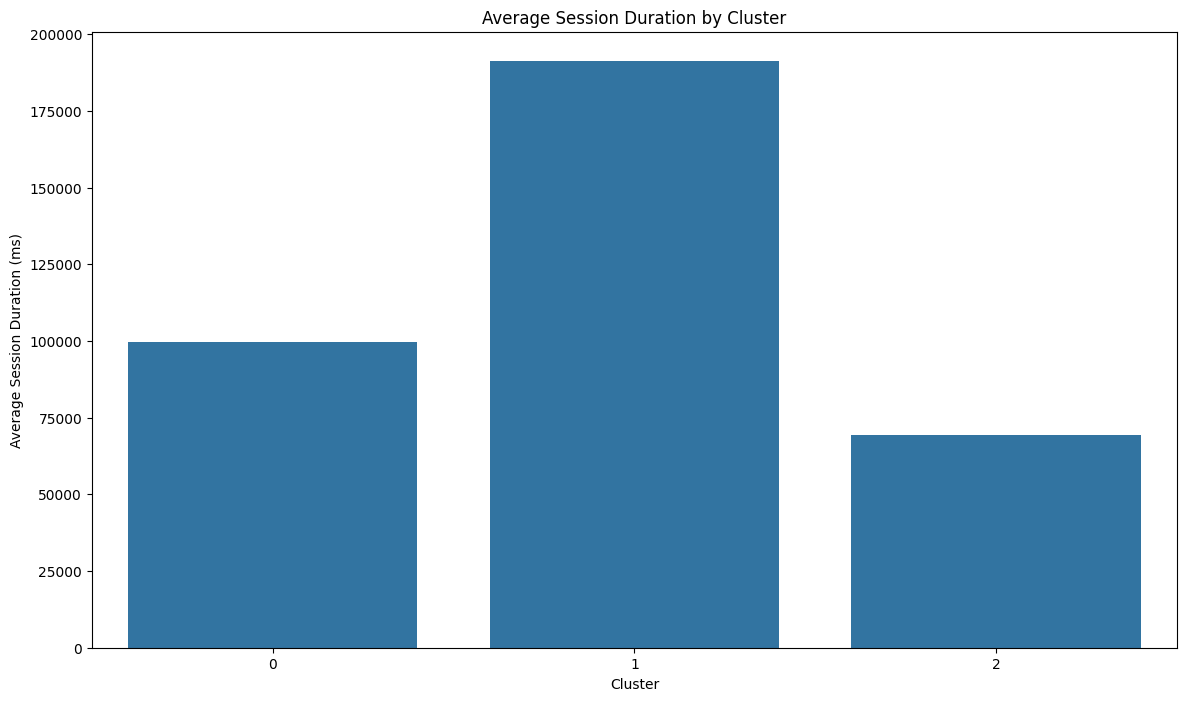

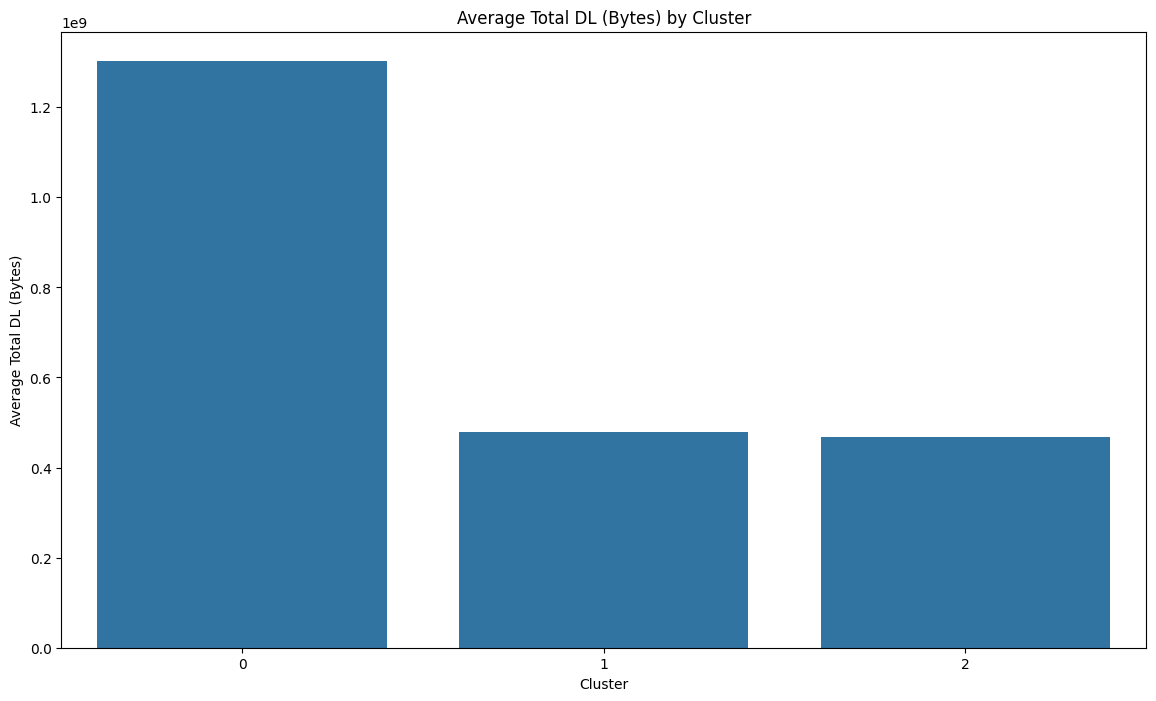

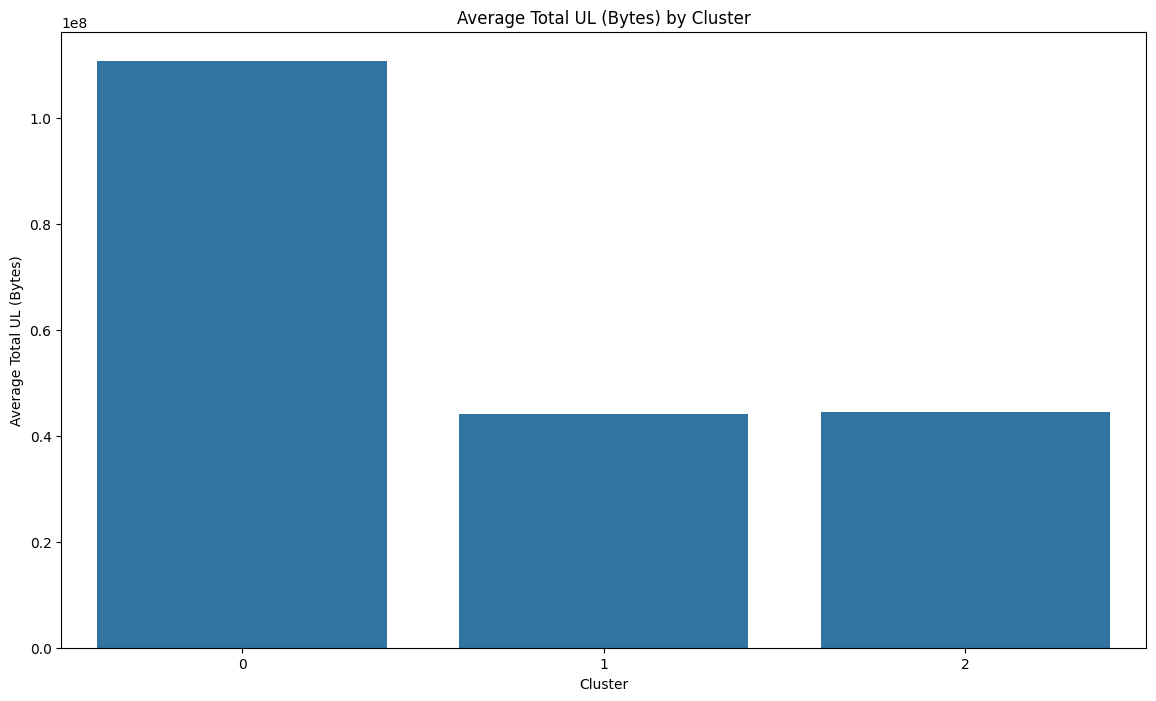

In [218]:
# Prepare features for normalization
features = customer_metrics_by_msisdn[['Average Session Duration (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Session Count']]

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Run K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics_by_msisdn['Cluster'] = kmeans.fit_predict(normalized_features)

# Display the first few rows to see the assigned clusters
print(customer_metrics_by_msisdn.head())

# Assuming you have a DataFrame called customer_metrics_by_msisdn with clustering results
cluster_summary = customer_metrics_by_msisdn.groupby('Cluster').agg({
    'Average Session Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Session Count': ['min', 'max', 'mean', 'sum'],
}).reset_index()

# Resetting the column names to flatten the multi-level index
cluster_summary.columns = ['Cluster', 
                           'Avg Session Duration Min', 'Avg Session Duration Max', 'Avg Session Duration Mean', 'Avg Session Duration Sum',
                           'Total DL Min', 'Total DL Max', 'Total DL Mean', 'Total DL Sum',
                           'Total UL Min', 'Total UL Max', 'Total UL Mean', 'Total UL Sum',
                           'Session Count Min', 'Session Count Max', 'Session Count Mean', 'Session Count Sum']

# Plotting Average Session Duration by Cluster
plt.figure(figsize=(14, 8))
sns.barplot(x='Cluster', y='Avg Session Duration Mean', data=cluster_summary)
plt.title('Average Session Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Session Duration (ms)')
plt.show()

# Plotting Average Total DL by Cluster
plt.figure(figsize=(14, 8))
sns.barplot(x='Cluster', y='Total DL Mean', data=cluster_summary)
plt.title('Average Total DL (Bytes) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total DL (Bytes)')
plt.show()

# Plotting Average Total UL by Cluster
plt.figure(figsize=(14, 8))
sns.barplot(x='Cluster', y='Total UL Mean', data=cluster_summary)
plt.title('Average Total UL (Bytes) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total UL (Bytes)')
plt.show()

Aggregated Data by MSISDN/Number:
         MSISDN/Number  TCP DL Retrans. Vol (Bytes)  Avg RTT DL (ms)  \
0        3.360100e+10                 2.080991e+07        46.000000   
1        3.360100e+10                 2.080991e+07        30.000000   
2        3.360100e+10                 2.080991e+07       109.795706   
3        3.360101e+10                 1.066000e+03        69.000000   
4        3.360101e+10                 1.507977e+07        57.000000   
...               ...                          ...              ...   
106851   3.379000e+10                 2.150440e+05        42.000000   
106852   3.379000e+10                 2.080991e+07        34.000000   
106853   3.197021e+12                 2.080991e+07       109.795706   
106854   3.370000e+14                 2.080991e+07       109.795706   
106855   8.823971e+14                 2.080991e+07       109.795706   

                          Handset Type  Avg Bearer TP DL (kbps)  
0       Huawei P20 Lite Huawei Nova 3E        

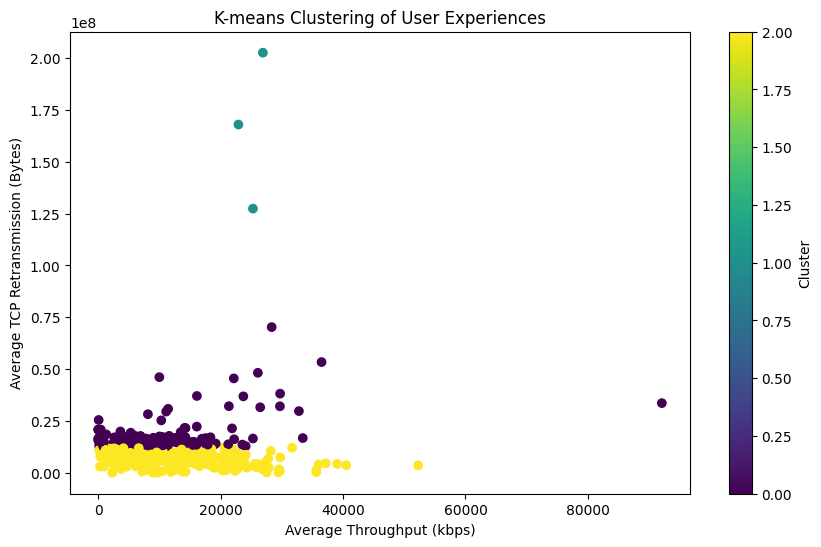

In [28]:
# Assuming 'df' is your DataFrame
# Replace missing values with mean for numerical columns and mode for categorical columns
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())
df['Avg Bearer TP DL (kbps)'] = df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean())
df['Avg Bearer TP UL (kbps)'] = df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean())
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])

# Aggregate information per customer
aggregated_data = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Handset Type': 'first',  # Assuming we want the first occurrence
    'Avg Bearer TP DL (kbps)': 'mean'
}).reset_index()

# Reporting the aggregated data
print("Aggregated Data by MSISDN/Number:\n", aggregated_data)

# Top 10 TCP retransmission values
top_tcp = df['TCP DL Retrans. Vol (Bytes)'].nlargest(10)

# Bottom 10 TCP retransmission values
bottom_tcp = df['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)

# Most frequent TCP retransmission values
most_frequent_tcp = df['TCP DL Retrans. Vol (Bytes)'].mode().head(10)

# Top 10 RTT values
top_rtt = df['Avg RTT DL (ms)'].nlargest(10)

# Bottom 10 RTT values
bottom_rtt = df['Avg RTT DL (ms)'].nsmallest(10)

# Most frequent RTT values
most_frequent_rtt = df['Avg RTT DL (ms)'].mode().head(10)

# Top 10 Throughput values
top_throughput = df['Avg Bearer TP DL (kbps)'].nlargest(10)

# Bottom 10 Throughput values
bottom_throughput = df['Avg Bearer TP DL (kbps)'].nsmallest(10)

# Most frequent Throughput values
most_frequent_throughput = df['Avg Bearer TP DL (kbps)'].mode().head(10)

# Reporting results
print("\nTop TCP Values:\n", top_tcp)
print("\nBottom TCP Values:\n", bottom_tcp)
print("\nMost Frequent TCP Values:\n", most_frequent_tcp)

print("\nTop RTT Values:\n", top_rtt)
print("\nBottom RTT Values:\n", bottom_rtt)
print("\nMost Frequent RTT Values:\n", most_frequent_rtt)

print("\nTop Throughput Values:\n", top_throughput)
print("\nBottom Throughput Values:\n", bottom_throughput)
print("\nMost Frequent Throughput Values:\n", most_frequent_throughput)

# Distribution of average throughput per handset type
throughput_distribution = df.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean().reset_index()
throughput_distribution.columns = ['Handset Type', 'Average Throughput (kbps)']

# Average TCP retransmission view per handset type
tcp_retransmission_distribution = df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean().reset_index()
tcp_retransmission_distribution.columns = ['Handset Type', 'Average TCP Retransmission (Bytes)']

# Reporting results
print("\nAverage Throughput per Handset Type:\n", throughput_distribution)
print("\nAverage TCP Retransmission per Handset Type:\n", tcp_retransmission_distribution)

# Interpretations
throughput_interpretation = throughput_distribution.describe()
tcp_retransmission_interpretation = tcp_retransmission_distribution.describe()

print("\nInterpretation of Average Throughput:\n", throughput_interpretation)
print("\nInterpretation of Average TCP Retransmission:\n", tcp_retransmission_interpretation)

# Step 1: Prepare data for clustering
experience_metrics = df.groupby('Handset Type').agg({
    'Avg Bearer TP DL (kbps)': 'mean',
    'TCP DL Retrans. Vol (Bytes)': 'mean'
}).reset_index()

# Step 2: Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
experience_metrics['Cluster'] = kmeans.fit_predict(experience_metrics[['Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']])

# Step 3: Analyze clusters
for cluster in range(3):
    cluster_data = experience_metrics[experience_metrics['Cluster'] == cluster]
    avg_throughput = cluster_data['Avg Bearer TP DL (kbps)'].mean()
    avg_retransmission = cluster_data['TCP DL Retrans. Vol (Bytes)'].mean()
    print(f"Cluster {cluster}:")
    print(f"  Average Throughput: {avg_throughput:.2f} kbps")
    print(f"  Average TCP Retransmission: {avg_retransmission:.2f} Bytes")
    print(f"  Handset Types: {list(cluster_data['Handset Type'])}")
    print()

# Optional: Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(experience_metrics['Avg Bearer TP DL (kbps)'], experience_metrics['TCP DL Retrans. Vol (Bytes)'], c=experience_metrics['Cluster'], cmap='viridis')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Average TCP Retransmission (Bytes)')
plt.title('K-means Clustering of User Experiences')
plt.colorbar(label='Cluster')
plt.show()